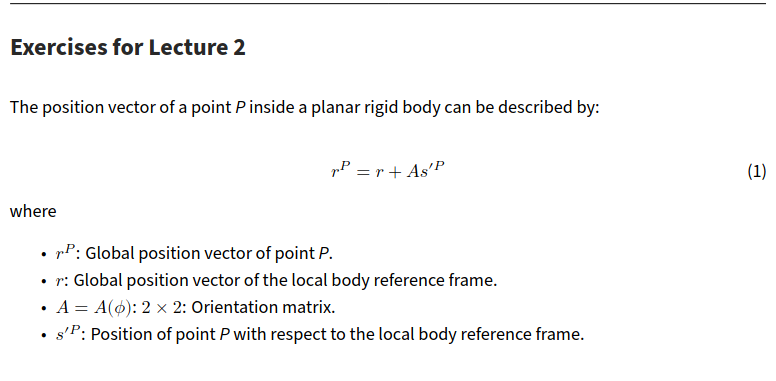

In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

def global_transformation_2D(translation_vector: npt.ArrayLike, rotational_angle, local_point: npt.ArrayLike) -> np.ndarray:
    orientation_matrix = np.squeeze(np.array([[np.cos(rotational_angle), -np.sin(rotational_angle)], [np.sin(rotational_angle), np.cos(rotational_angle)]]))
    local_point = np.atleast_1d(local_point)
    
    global_vector = translation_vector + orientation_matrix @ local_point
    
    return global_vector

"""
trans = np.array([1, 1])
angle = np.array([np.pi/2])
local = np.array([1, 1])
print(np.round(global_transformation_2D(trans, angle, local)))
"""

'\ntrans = np.array([1, 1])\nangle = np.array([np.pi/2])\nlocal = np.array([1, 1])\nprint(np.round(global_transformation_2D(trans, angle, local)))\n'

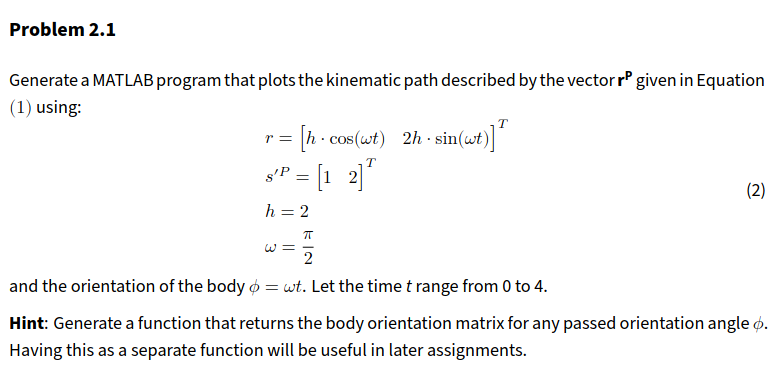

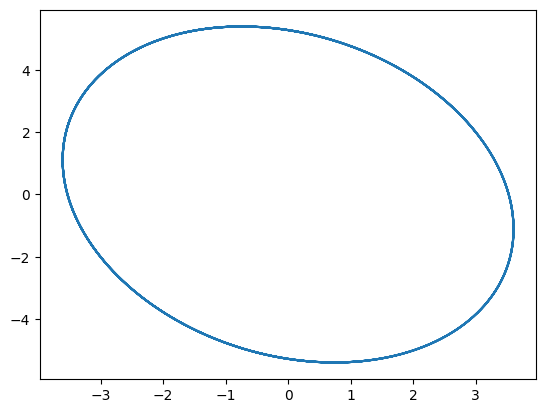

In [2]:
h = 2
omega = np.pi/2
t = np.arange(0, 6*np.pi, 0.01)
body_orientation = t*omega
s_p = np.array([1, 2]).T
translation_array = np.array([h*np.cos(body_orientation), 2*h*np.sin(body_orientation)]).T

kinematic_path_points = np.empty((len(t), 2))

for index, timepoints in enumerate(t):
    kinematic_path_points[index] = global_transformation_2D(translation_array[index, :], body_orientation[index], s_p)


#print(kinematic_path_points)
combined = kinematic_path_points[:,0] + kinematic_path_points[:,1]

plt.plot(kinematic_path_points[:,0], kinematic_path_points[:,1])